# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [100]:
#install needed packages
!pip install os  
!pip install pandas
!pip install requests
!pip install kaggle
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
#imports
import pandas as pd
import requests
import os
import kaggle
import matplotlib.pyplot as plt

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

I want to take a look at how increases in money correlate with a movies Rotten Tomatoes score. Specifically I will take a look at how gross revenue and budget impact the movies score on Rotten Tomatoes.

### **1.2.** Gather at least two datasets using two different data gathering methods


#### **Dataset 1: Rotten Tomatoes**

I selected this dataset as it contains the Rotten Tomatoes Tomatometer score for the movies.

Type: CSV File

Method: Manually downloaded

Dataset variables:

*   Rank: Ranking of the movie on the list
*   Title: The title of the movie
*   RatingTomatometer: The rating of the movie on Rotten Tomatoes
*   No. of Reviews: The number of reviews the movies has received
*   Genres: The genre classification of the movie

In [102]:
#Load the Rotten Tomatoes data into a pandas dataframe
tomatoes = pd.read_csv('RottenTomatoes/rotten_tomatoes_top_movies_2019-01-15.csv',
                       dtype={'Rank':'Int64',
                             'Title':'string',
                             'RatingTomatometer':'Int64',
                             'No. of Reviews':'Int64',
                             'Genres':'string'},
                       index_col='index')

#show the dataframe
tomatoes.head(10)

,Rank,Title,RatingTomatometer,No. of Reviews,Genres
index,,,,,
0,1,Black Panther (2018),97,444,action|adventure
1,2,Mad Max: Fury Road (2015),97,394,action|adventure
2,3,Wonder Woman (2017),93,410,action|adventure
3,4,Metropolis (1927),99,118,action|adventure
4,5,Coco (2017),97,308,action|adventure
5,6,Dunkirk (2017),92,413,action|adventure
6,7,Incredibles 2 (2018),94,332,action|adventure
7,8,Star Wars: The Last Jedi (2017),91,419,action|adventure
8,9,Logan (2017),93,371,action|adventure


#### Dataset 2: IMDB

I selected this dataset as it contains the budget and gross revenue for the movies.

Type: CSV file

Method: API method from Kaggle

Dataset variables:

*   color: If the movie is in color or black and white
*   director_name: Name of the director of the movie
*   num_critic_for_reviews: Number of critics for the review
*   duration: Duration of the movie
*   director_facebook_likes: Number of likes the director has on Facebook
*   actor_3_facebook_likes: Number of likes the third listed actor has on Facebook
*   actor_2_name: Name of the second listed actor
*   actor_1_facebook_likes: Number of likes the first listed actor has on Facebook
*   gross: Gross revenue the movie made
*   genres: Genres of the movie
*   actor_1_name: Name of the first listed actor
*   movie_title: Tite of the movie
*   num_voted_users: Number of users that voted
*   cast_total_facebook_likes: Total number of likes the cast has on Facebook
*   actor_3_name: Name of the third listed actor
*   facenumber_in_poster: Number of faces in the movies poster
*   plot_keywords: Keywords to describe the plot of the movie
*   movie_imdb_link: link to the movie's page on IMDB
*   num_user_for_reviews: Number of users that reviewed the movie
*   lanuage: Language movie is in
*   country: Country move was produced in
*   content_rating: Rating of the movie
*   budget: Movie's budget
*   title_year: Release year of movie
*   actor_2_facebook_likes: Number of likes the second listed actor has on Facebook
*   imdb_score: Score on IMDB
*   aspect_ratio: Aspect ratio of the movie
*   movie_facebook_likes: Likes the movie has on Facebook 

In [103]:
#create a new folder for the imdb dataset
if not os.path.exists('imdb'):
    os.makedirs('imdb')

In [104]:
# Download imdb dataset from https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset
kaggle.api.dataset_download_files('carolzhangdc/imdb-5000-movie-dataset', path='imdb', unzip=True)
# Load the IMDB data into a pandas dataframe
imdb = pd.read_csv('imdb/movie_metadata.csv',
                     dtype={'color':'string',
                            'director_name':'string',
                            'num_critic_for_reviews':'Int64',
                            'duration':'Int64',
                            'director_facebook_likes':'Int64',
                            'actor_3_facebook_likes':'Int64',
                            'actor_2_name':'string',
                            'actor_1_facebook_likes':'Int64',
                            'gross':'float',
                            'genres':'string',
                            'actor_1_name':'string',
                            'movie_title':'string',
                            'num_voted_users':'Int64',
                            'cast_total_facebook_likes':'Int64',
                            'actor_3_name':'string',
                            'facenumber_in_poster':'Int64',
                            'plot_keywords':'string',
                            'movie_imdb_link':'string',
                            'num_user_for_reviews':'Int64',
                            'language':'string',
                            'country':'string',
                            'content_rating':'string', 
                            'budget':'float',
                            'title_year':'Int64',
                            'actor_2_facebook_likes':'Int64',
                            'imdb_score':'float',
                            'aspect_ratio':'float',
                            'movie_facebook_likes':'Int64'})

#show the dataframe
imdb.head(10)


Dataset URL: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012,23000,8.5,2.35,164000
4,<NA>,Doug Walker,<NA>,<NA>,131,<NA>,Rob Walker,131,NaN,Documentary,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,12,7.1,NaN,0
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,...,738,English,USA,PG-13,263700000.0,2012,632,6.6,2.35,24000
6,Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303.0,Action|Adventure|Romance,...,1902,English,USA,PG-13,258000000.0,2007,11000,6.2,2.35,0
7,Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387,English,USA,PG,260000000.0,2010,553,7.8,1.85,29000
8,Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599.0,Action|Adventure|Sci-Fi,...,1117,English,USA,PG-13,250000000.0,2015,21000,7.5,2.35,118000
9,Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980.0,Adventure|Family|Fantasy|Mystery,...,973,English,UK,PG,250000000.0,2009,11000,7.5,2.35,10000


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [105]:
#view the first 10 rows of the IMDB dataset
imdb.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012,23000,8.5,2.35,164000
4,<NA>,Doug Walker,<NA>,<NA>,131,<NA>,Rob Walker,131,NaN,Documentary,...,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,12,7.1,NaN,0
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,...,738,English,USA,PG-13,263700000.0,2012,632,6.6,2.35,24000
6,Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303.0,Action|Adventure|Romance,...,1902,English,USA,PG-13,258000000.0,2007,11000,6.2,2.35,0
7,Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387,English,USA,PG,260000000.0,2010,553,7.8,1.85,29000
8,Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599.0,Action|Adventure|Sci-Fi,...,1117,English,USA,PG-13,250000000.0,2015,21000,7.5,2.35,118000
9,Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980.0,Adventure|Family|Fantasy|Mystery,...,973,English,UK,PG,250000000.0,2009,11000,7.5,2.35,10000


In [106]:
#Check the number of NA values in the imdb dataframe
print(imdb.isnull().sum().sum())

2700


Issue and justification: The IMDB dataset has missing values. This can be seen visually by seeing that the row four has NA values. It is seen programmatically by seeing that there are 2700 NA values in the IMDB dataframe.

### Quality Issue 2:

In [107]:
#Show the unedited title column from the imdb dataframe and the tomatoes dataframe
print(imdb['movie_title'].head(10))
print(tomatoes['Title'].head(10))

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
5                                         John Carter 
6                                        Spider-Man 3 
7                                             Tangled 
8                             Avengers: Age of Ultron 
9              Harry Potter and the Half-Blood Prince 
Name: movie_title, dtype: string
index
0                                 Black Panther (2018)
1                            Mad Max: Fury Road (2015)
2                                  Wonder Woman (2017)
3                                    Metropolis (1927)
4                                          Coco (2017)
5                                       Dunkirk (2017)
6                                 Incredibles 2 (2018)
7                      Sta

In [108]:
#Check if any titlles in the tomatoes dataframe are in the imdb dataframe
print(tomatoes['Title'].isin(imdb['movie_title']).any())

False


Issue and justification: The title columns in the various datasets do not have the same format. This can be seen visually by comparing the titles from the first 10 rows of each data set and seeing that the Rotten Tomatoes dataset is including the years at the end. This is seen programmatically by searching for any titles that are the same in the two datasets and seeing there are no matches.

### Tidiness Issue 1:

In [109]:
#Show the genres column from the imdb dataframe and the tomatoes dataframe
print(imdb['genres'].head(10))
print(tomatoes['Genres'].head(10))

0                      Action|Adventure|Fantasy|Sci-Fi
1                             Action|Adventure|Fantasy
2                            Action|Adventure|Thriller
3                                      Action|Thriller
4                                          Documentary
5                              Action|Adventure|Sci-Fi
6                             Action|Adventure|Romance
7    Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                              Action|Adventure|Sci-Fi
9                     Adventure|Family|Fantasy|Mystery
Name: genres, dtype: string
index
0    action|adventure
1    action|adventure
2    action|adventure
3    action|adventure
4    action|adventure
5    action|adventure
6    action|adventure
7    action|adventure
8    action|adventure
9    action|adventure
Name: Genres, dtype: string


In [110]:
#Count the genres in each row of the imdb dataframe and the tomatoes dataframe
print(imdb['genres'].str.split('|').str.len().head(10))
print(tomatoes['Genres'].str.split('|').str.len().head(10))

0    4
1    3
2    3
3    2
4    1
5    3
6    3
7    7
8    3
9    4
Name: genres, dtype: int64
index
0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Genres, dtype: int64


Issue and justification: The genre column of the two tables contains multiple observations. This can be seen visually by viewing the values available in the genres column. This is seen programmatically by splitting the genre column on the "|" separator and counting the number of observations in each row.

### Tidiness Issue 2: 

In [111]:
#Visually look at the first 10 rows movie titles of the imdb dataframe  
print(imdb['movie_title'].head(10))

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
5                                         John Carter 
6                                        Spider-Man 3 
7                                             Tangled 
8                             Avengers: Age of Ultron 
9              Harry Potter and the Half-Blood Prince 
Name: movie_title, dtype: string


In [112]:
#Visually look at the first 10 rows movie titles of the tomatoes dataframe
print(tomatoes['Title'].head(10))

index
0                                 Black Panther (2018)
1                            Mad Max: Fury Road (2015)
2                                  Wonder Woman (2017)
3                                    Metropolis (1927)
4                                          Coco (2017)
5                                       Dunkirk (2017)
6                                 Incredibles 2 (2018)
7                      Star Wars: The Last Jedi (2017)
8                                         Logan (2017)
9    Star Wars: Episode VII - The Force Awakens (2015)
Name: Title, dtype: string


In [113]:
#Review the column names of the imdb dataframe and the tomatoes dataframe
print(imdb.columns)
print(tomatoes.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
Index(['Rank', 'Title', 'RatingTomatometer', 'No. of Reviews', 'Genres'], dtype='object')


Issue and justification: The two datasets are largely for a single observation but are stored in two datasets. If we look at the first ten title of each table we can see that Star Wars Episode VI is in both datasets. Programmatically reviewing the columns between the two tables we can see that each dataset contains information for movies and so is observing the same thing.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [114]:
#Make copies of the datasets to ensure the raw dataframes are not impacted
imdb_raw = imdb.copy()
tomatoes_raw = tomatoes.copy()

### **Quality Issue 1: Missing values**

In [115]:
#Remove the columns that won't be used in the analysis (keeping gross, budget, genres, and movie_title) in the imdb dataframe
imdb = imdb[['movie_title', 'gross', 'budget', 'genres']].copy()
#Remove the columns that won't be used in the analysis (keeping RatingTomatometer, Genres, and Title) in the tomatoes dataframe
tomatoes = tomatoes[['Title', 'RatingTomatometer', 'Genres']].copy()
#Drop the rows with missing values in the imdb dataframe and the tomatoes dataframe
imdb.dropna(inplace=True)
tomatoes.dropna(inplace=True)

In [116]:
#Check the number of rows with NA values in the imdb dataframe and the tomatoes dataframe after dropping missing values
print(imdb.isnull().sum().sum())
print(tomatoes.isnull().sum().sum())

0
0


Justification: Since the question I want to look at is focused on the relationship between gross revenue and budget with the Rotten Tomatoes score I removed the other columns as a missing value in those fields is not an issue for the question at hand. I then remove any rows that are missing values in the remaining columns as each value is needed to answer the intended question

### **Quality Issue 2: Title format**

In [117]:
#Convert the titles columns to be a consistent format without the year in the title in both dataframes
imdb['movie_title'] = imdb['movie_title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
tomatoes['Title'] = tomatoes['Title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
#Set the titles columns to lowercase in both dataframes
imdb['movie_title'] = imdb['movie_title'].str.lower()
tomatoes['Title'] = tomatoes['Title'].str.lower()

In [118]:
#Check the first 10 rows of the imdb dataframe and the tomatoes dataframe after removing the year from the titles
print(imdb['movie_title'].head(10))
print(tomatoes['Title'].head(10))

0                                       avatar
1     pirates of the caribbean: at world's end
2                                      spectre
3                        the dark knight rises
5                                  john carter
6                                 spider-man 3
7                                      tangled
8                      avengers: age of ultron
9       harry potter and the half-blood prince
10          batman v superman: dawn of justice
Name: movie_title, dtype: string
index
0                                 black panther
1                            mad max: fury road
2                                  wonder woman
3                                    metropolis
4                                          coco
5                                       dunkirk
6                                 incredibles 2
7                      star wars: the last jedi
8                                         logan
9    star wars: episode vii - the force awakens
Name: Title

Justification: Removed the year from the datasets and set them to lowercase to ensure they have the same format.

### **Tidiness Issue 1: Genre column**

In [119]:
#Drop the genres column from the imdb dataframe and the tomatoes dataframe
imdb.drop(columns=['genres'], inplace=True)
tomatoes.drop(columns=['Genres'], inplace=True)

In [120]:
#Show the column names of the imdb dataframe and the tomatoes dataframe after dropping the genres column
print(imdb.columns)
print(tomatoes.columns)

Index(['movie_title', 'gross', 'budget'], dtype='object')
Index(['Title', 'RatingTomatometer'], dtype='object')


Justification: Since the genre column is also not needed for the question I am trying to answer we can simply drop the column rather than creating a separate table to house each observed genre of the movies.

### **Tidiness Issue 2: Two tables for one observation**

In [121]:
#Drop duplicate rows based on the movie titles in both dataframes
imdb = imdb.drop_duplicates(subset=['movie_title'])
tomatoes = tomatoes.drop_duplicates(subset=['Title'])

#Merge on the unique titles
merged_df = pd.merge(imdb, tomatoes, left_on='movie_title', right_on='Title', how='inner')

# Combine the 'movie_title' and 'Title' columns into a single 'title' column, then drop the originals
merged_df['title'] = merged_df['movie_title']  
merged_df.drop(['movie_title', 'Title'], axis=1, inplace=True)

In [122]:
#Show the first 10 rows of the combined dataframe
print(merged_df.head(10))

         gross       budget  RatingTomatometer  \
0  200807262.0  260000000.0                 89   
1  301956980.0  250000000.0                 83   
2   89289910.0  215000000.0                 31   
3  218051260.0  207000000.0                 98   
4  658672302.0  200000000.0                 89   
5  407197282.0  250000000.0                 91   
6  304360277.0  200000000.0                 92   
7  373377893.0  200000000.0                 93   
8  414984497.0  200000000.0                 98   
9  233914986.0  200000000.0                 90   

                                    title  
0                                 tangled  
1  harry potter and the half-blood prince  
2                         the lone ranger  
3                               king kong  
4                                 titanic  
5              captain america: civil war  
6                                 skyfall  
7                            spider-man 2  
8                             toy story 3  
9        

Justification: I first removed any remaining duplicated rows in the data set. I then merged the datasets on the title columns. At that point I then created a new title column and dropped the two orignal title columns. This allows me to get a single table to the observation.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [123]:
#Save the merged dataframe to a CSV file indicating it is the cleaned version
merged_df.to_csv('imdb_rotten_tomatoes_cleaned.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

I want to take a look at how increases in money correlate with a movies Rotten Tomatoes score. Specifically I will take a look at how gross revenue and budget impact the movies score on Rotten Tomatoes.

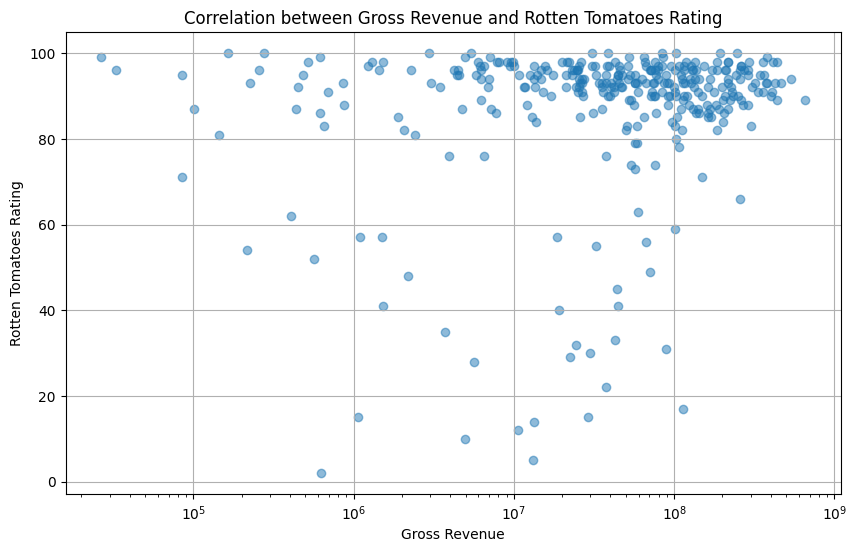

In [124]:
#Create a chart showing the correlation between the gross revenue and the Rotten Tomatoes rating
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['gross'], merged_df['RatingTomatometer'], alpha=0.5)
plt.title('Correlation between Gross Revenue and Rotten Tomatoes Rating')
plt.xlabel('Gross Revenue')
plt.ylabel('Rotten Tomatoes Rating')
plt.xscale('log')  # Use log scale for better visibility
plt.yscale('linear')  # Linear scale for ratings
plt.grid(True)
plt.show()

Gross revenue does not appear to have any strong correlation with the Rotten Tomatoes score a movie receives.

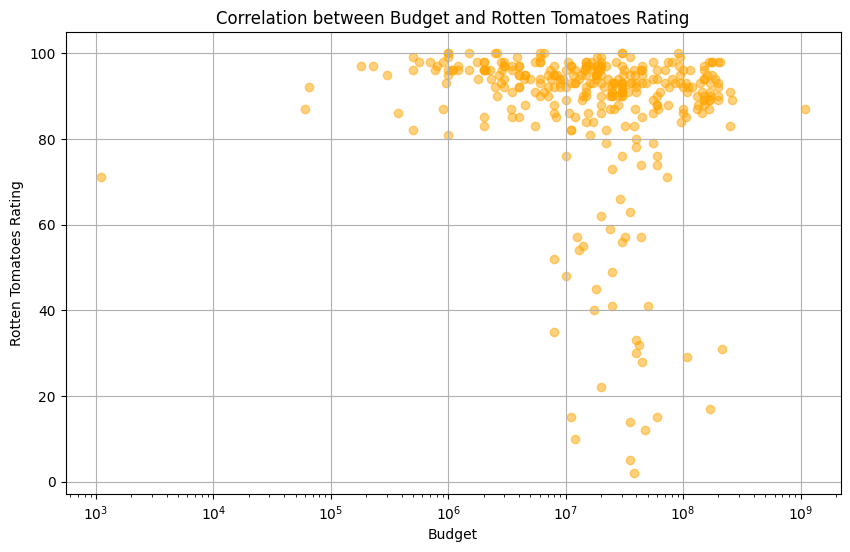

In [125]:
#Create a plot showing the correlation between the budget and the Rotten Tomatoes rating
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['budget'], merged_df['RatingTomatometer'], alpha=0.5, color='orange')
plt.title('Correlation between Budget and Rotten Tomatoes Rating')
plt.xlabel('Budget')
plt.ylabel('Rotten Tomatoes Rating')
plt.xscale('log')  # Use log scale for better visibility    
plt.yscale('linear')  # Linear scale for ratings
plt.grid(True)
plt.show()


The budget also doesn't appear to have any siginificant correlation to the score a movie receives on Rotten Tomatoes.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

If I had more time I would likely look into more variables from the data to see how they correlate to the Rotten Tomatoes score. I may take a look at how Facebook likes impacts the Rotten Tomatoes score to see if a positive social media presence seems to impact the score.